# Guntign batu kertas


In [ ]:
import os
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')


ROOT_PATH = "/content/drive/MyDrive/ML/Dataset/Rock-Paper-Scissors/Rock-Paper-Scissors"

train_path = os.path.join(ROOT_PATH, "train")
test_path = os.path.join(ROOT_PATH, "test")

train_paper_path = os.path.join(train_path, "paper")
train_rock_path = os.path.join(train_path, "rock")
train_scissors_path = os.path.join(train_path, "scissors")

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
valid_paper_images = os.listdir(test_path)
print(valid_paper_images)

['paper', 'rock', 'scissors']


# Train Paper

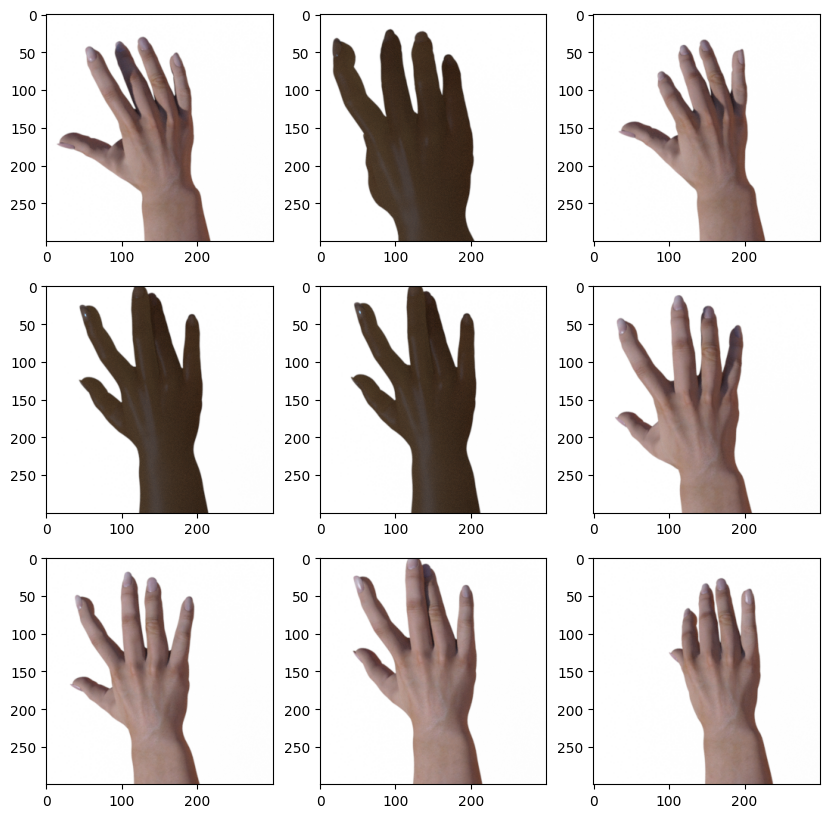

In [5]:
plt.figure(figsize=(10,10))

for i in range(9):
  image_path = os.path.join(train_paper_path, train_paper_images[i])
  ax = plt.subplot(3,3,i+1)
  image = tf.keras.preprocessing.image.load_img(image_path)
  plt.imshow(image)


# Train Scicors


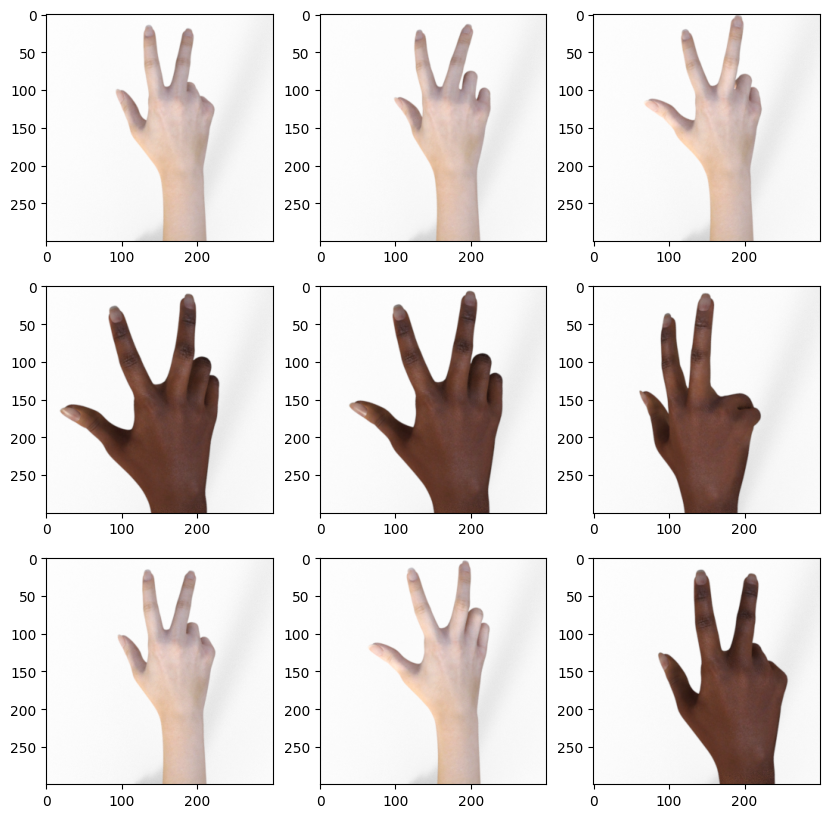

In [6]:
plt.figure(figsize=(10,10))

for i in range(9):
  image_path = os.path.join(train_scissors_path, train_scissors_images[i])
  ax = plt.subplot(3,3,i+1)
  image = tf.keras.preprocessing.image.load_img(image_path)
  plt.imshow(image)

#Train Rock


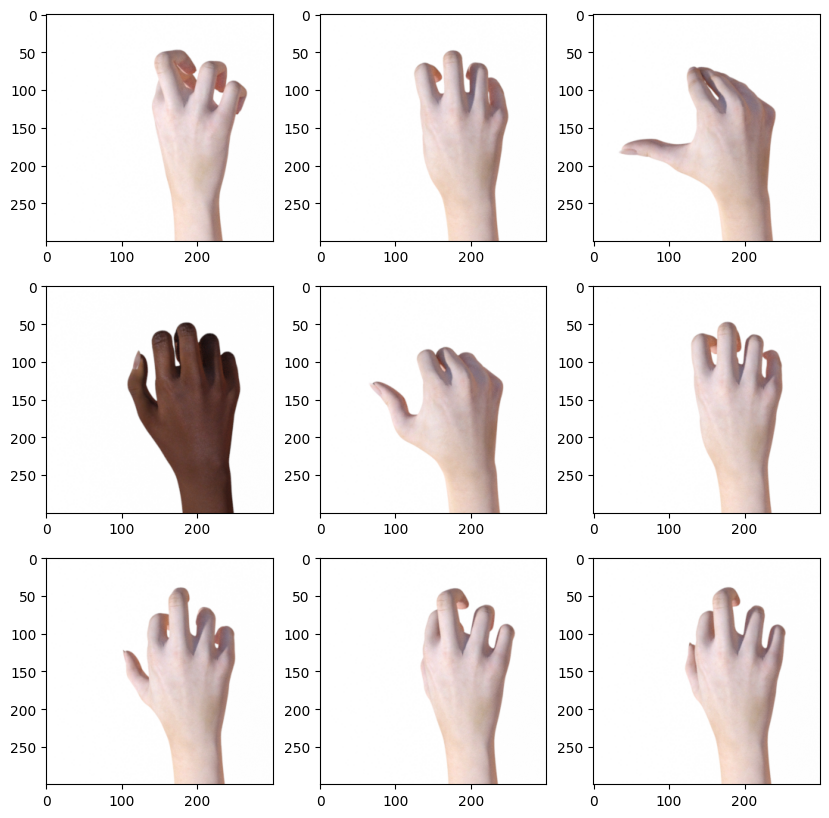

In [7]:
plt.figure(figsize=(10,10))

for i in range(9):
  image_path = os.path.join(train_rock_path, train_rock_images[i])
  ax = plt.subplot(3,3,i+1)
  image = tf.keras.preprocessing.image.load_img(image_path)
  plt.imshow(image)

# Data Preprocessing

In [8]:
train = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(224, 224),
    label_mode='categorical'
)

Found 2520 files belonging to 3 classes.


In [9]:
test = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(224, 224),
    label_mode='categorical'
)

Found 372 files belonging to 3 classes.


In [10]:
for image, label in train.take(1):
  print(image[0].shape)
  print(label[0])

(224, 224, 3)
tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)


#Modelling

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(7,7)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
# Mendefinisikan ukuran input gambar
img_height, img_width = 224, 224

# Membuat model Sequential
model = Sequential()

# Menambahkan layer konvolusi dan pooling
conv1 = Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3))
model.add(conv1)
model.add(MaxPooling2D((2, 2)))

conv2 = Conv2D(64, (3, 3), activation='relu')
model.add(conv2)
model.add(MaxPooling2D((2, 2)))

conv3 = Conv2D(128, (3, 3), activation='relu')
model.add(conv3)
model.add(MaxPooling2D((2, 2)))

# Flatten sebelum fully connected layer
model.add(Flatten())

# Menambahkan fully connected layer
dense1 = Dense(128, activation='relu')
model.add(dense1)

output_layer = Dense(3, activation='softmax')  # Output layer dengan 3 kelas
model.add(output_layer)

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mencetak ringkasan model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [13]:
model.fit(
    train,
    validation_data=test,
    epochs=10
)

Epoch 1/10
79/79 [==============================] - 407s 5s/step - loss: 61.0291 - accuracy: 0.8440 - val_loss: 2.0940 - val_accuracy: 0.6075
Epoch 2/10
79/79 [==============================] - 14s 162ms/step - loss: 0.1311 - accuracy: 0.9627 - val_loss: 0.9048 - val_accuracy: 0.8306
Epoch 3/10
79/79 [==============================] - 14s 161ms/step - loss: 0.0760 - accuracy: 0.9782 - val_loss: 2.2218 - val_accuracy: 0.6317
Epoch 4/10
79/79 [==============================] - 14s 151ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 4.0784 - val_accuracy: 0.6452
Epoch 5/10
79/79 [==============================] - 14s 160ms/step - loss: 1.1522e-04 - accuracy: 1.0000 - val_loss: 4.0798 - val_accuracy: 0.6478
Epoch 6/10
79/79 [==============================] - 14s 151ms/step - loss: 3.7318e-05 - accuracy: 1.0000 - val_loss: 4.1218 - val_accuracy: 0.6478
Epoch 7/10
79/79 [==============================] - 14s 157ms/step - loss: 2.4884e-05 - accuracy: 1.0000 - val_loss: 4.1913 - val_accur

In [14]:
val_loss, val_acc = model.evaluate(test)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_acc}' )

12/12 [==============================] - 2s 46ms/step - loss: 4.4093 - accuracy: 0.6210
Validation Loss: 4.409271240234375, Validation Accuracy: 0.6209677457809448


#Add Augmentation

In [15]:
# Membuat objek ImageDataGenerator untuk augmentasi data training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Membuat objek ImageDataGenerator untuk data validasi (tanpa augmentasi)
val_datagen = ImageDataGenerator(rescale=1./255)

# Memuat data training dengan augmentasi
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Memuat data validasi
val_generator = val_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model dengan data augmentasi
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Epoch 1/10
78/78 [==============================] - 50s 602ms/step - loss: 0.8933 - accuracy: 0.5932 - val_loss: 0.6147 - val_accuracy: 0.8551
Epoch 2/10
78/78 [==============================] - 47s 602ms/step - loss: 0.5541 - accuracy: 0.7721 - val_loss: 0.3298 - val_accuracy: 0.8466
Epoch 3/10
78/78 [==============================] - 50s 638ms/step - loss: 0.3905 - accuracy: 0.8553 - val_loss: 0.1852 - val_accuracy: 0.9659
Epoch 4/10
78/78 [==============================] - 47s 599ms/step - loss: 0.2977 - accuracy: 0.8955 - val_loss: 0.1134 - val_accuracy: 0.9943
Epoch 5/10
78/78 [==============================] - 47s 598ms/step - loss: 0.2245 - accuracy: 0.9196 - val_loss: 0.2025 - val_accuracy: 0.9148
Epoch 6/10
78/78 [==============================] - 50s 644ms/step - loss: 0.1908 - accuracy: 0.9329 - val_loss: 0.1285 - val_accuracy: 0.9517
Epoch 7/10
78/78 [==============================] - 47s 599

#Predicted New Image

1/1 [==============================] - 0s 308ms/step
Predicted Label: rock
Prediction Probabilities: [[4.5374295e-13 1.0000000e+00 2.8804549e-13]]


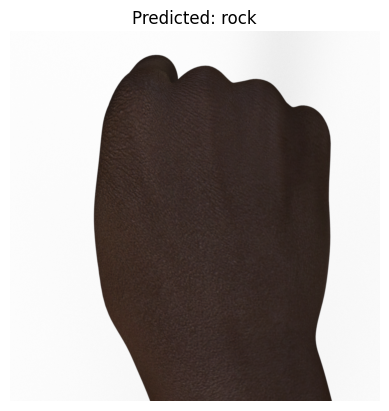

In [20]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

# Fungsi untuk memuat dan mempersiapkan gambar
def load_and_prepare_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Fungsi untuk melakukan prediksi pada gambar baru
def predict_image(img_path, model, class_labels):
    img = load_and_prepare_image(img_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    return class_labels[predicted_class], prediction

class_labels = sorted(os.listdir(train_path))

# Path gambar yang ingin diprediksi
img_path = "/content/drive/MyDrive/ML/Dataset/Rock-Paper-Scissors/Rock-Paper-Scissors/validation/Rock/rock-hires1.png"

# Lakukan prediksi
predicted_label, prediction_probabilities = predict_image(img_path, model, class_labels)

# Tampilkan hasil prediksi
print(f"Predicted Label: {predicted_label}")
print(f"Prediction Probabilities: {prediction_probabilities}")

# Menampilkan gambar dan prediksi
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()